Exercise: Predict Car Prices Using Multiple Linear Regression
Problem Statement:

A car dealership wants to predict the price of a used car based on multiple features such as the year of manufacture, mileage (km driven), engine size (cc), and fuel type (petrol = 1, diesel = 0).

 Given the dataset below, implement multiple linear regression using gradient descent to find the optimal parameters.




In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import  StandardScaler


In [40]:
# Features: [Year, Mileage (km), Engine Size (cc), Fuel Type (Petrol=1, Diesel=0)]
X = np.array([
    [2015, 60000, 1500, 1],
    [2018, 30000, 1800, 1],
    [2012, 85000, 1300, 0],
    [2016, 40000, 1600, 1],
    [2014, 70000, 1400, 0],
    [2017, 20000, 2000, 1],
    [2011, 90000, 1200, 0],
    [2019, 15000, 2200, 1]
])

# Target: Car Price in $1000s
Y= np.array([12, 18, 8, 15, 10, 20, 6, 25])

In [41]:
#Features Scaling (Standarization)

scale=StandardScaler()

X_norm=scale.fit_transform(X)

#add bais

X_bias=np.c_[np.ones(X_norm.shape[0]),X_norm]

X_bais

array([[ 1.        , -0.0949158 ,  0.32118203, -0.38235956,  0.77459667],
       [ 1.        ,  1.0440738 , -0.7800135 ,  0.53530338,  0.77459667],
       [ 1.        , -1.23390539,  1.23884496, -0.99413485, -1.29099445],
       [ 1.        ,  0.2847474 , -0.41294832, -0.07647191,  0.77459667],
       [ 1.        , -0.474579  ,  0.6882472 , -0.6882472 , -1.29099445],
       [ 1.        ,  0.6644106 , -1.14707867,  1.14707867,  0.77459667],
       [ 1.        , -1.61356859,  1.42237755, -1.30002249, -1.29099445],
       [ 1.        ,  1.42373699, -1.33061126,  1.75885396,  0.77459667]])

In [42]:
# Initialize parameters

theta=np.zeros(X_bais.shape[1])
alpha=0.1
iterations=1000
m=X.shape[0]
cost_history=[]


In [45]:
#Apply Gradien Descent Algorithm

for _ in range(iterations):
    y_pred=X_bias @ theta
    
    #compute mean error square
    error=y_pred - Y
    cost=(1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)
    
    # Compute gradients and update parameters
    
    gradients=(1/m) * (X_bais.T @ error)
    theta-=alpha*gradients

# Print final parameters
print(f"Final Theta Coefficients: {theta}")
    


Final Theta Coefficients: [14.25        1.26881754 -0.35581862  4.50838777 -0.02786273]


array([14.25      ,  1.26881754, -0.35581862,  4.50838777, -0.02786273])

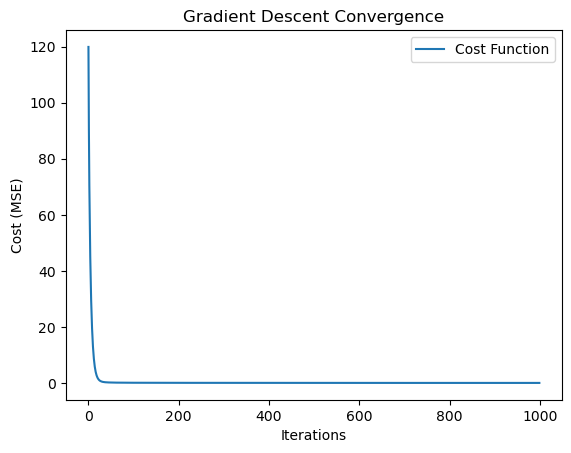

In [46]:
plt.plot(range(iterations), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

In [57]:
new_car=np.array([[2017,50000,1600,1]])

new_car_norm=scale.transform(new_car)


new_car_bais=np.c_[np.ones(new_car_norm.shape[0]),new_car_norm]

predicetedCarPrice=new_car_bais @ theta

print(f"Predicted Car Price: ${predicetedCarPrice[0] * 1000:.2f}")

Predicted Car Price: $14742.99


(5,)